### 목표
- DecisionTree 모델 사용해보기
- 모델 최적화 해보자

#### 1. 모델정의

In [14]:
from sklearn.tree import DecisionTreeRegressor
#예측하기 좋은 최적의 질문을 만들어 학습하는 모델

In [15]:
house_model = DecisionTreeRegressor()

#### 2. 모델학습
- 데이터로딩 후 검색

In [16]:
import pandas as pd

In [17]:
# 데이터로딩 (훈련용데이터, 평가용데이터)
train = pd.read_csv("./data/house/train.csv")
test = pd.read_csv("./data/house/test.csv")
#전체 데이터 갯수 파악
len(train)#10185
len(test)#3395
print('평가용 데이터 : ', test.shape) #price칼럼이 없음
print('훈련용 데이터 : ', train.shape) 
#전체 컬럼이 무엇이있는지 파악
train.columns
train.head()
# train.info() #데이터타입,결측치(null) 보여줌

평가용 데이터 :  (3395, 21)
훈련용 데이터 :  (10185, 22)


,Id,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
0,5467,Rosanna,22 Douglas St,2,h,S,Miles,19/11/2016,11.4,3084,...,1.0,757,NaN,NaN,Banyule,-37.74280,145.07000,Eastern Metropolitan,3540,1200000
1,4365,North Melbourne,103/25 Byron St,1,u,SP,Jellis,16/07/2016,2.3,3051,...,1.0,0,60.0,2012.0,Melbourne,-37.80200,144.95160,Northern Metropolitan,6821,450000
2,9741,Surrey Hills,4/40 Durham Rd,3,u,SP,Noel,17/06/2017,10.2,3127,...,1.0,149,NaN,NaN,Boroondara,-37.82971,145.09007,Southern Metropolitan,5457,780000
3,11945,Cheltenham,3/33 Sunray Av,2,t,S,Buxton,29/07/2017,17.9,3192,...,1.0,171,NaN,NaN,Kingston,-37.96304,145.06421,Southern Metropolitan,9758,751000
4,4038,Mont Albert,7/27 High St,3,t,S,Fletchers,15/10/2016,11.8,3127,...,2.0,330,148.0,2001.0,Whitehorse,-37.81670,145.10700,Eastern Metropolitan,2079,1310000


In [18]:
#기술통계 확인 최대값, 최소값, 최빈값....
train.describe(include='all') # include all 범주형 데이터도 보여줌
train.describe()


,Id,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Price
count,10185.000000,10185.000000,10185.000000,10185.000000,10185.000000,10185.000000,10142.000000,10185.000000,5367.000000,6153.000000,10185.000000,10185.000000,10185.000000,1.018500e+04
mean,6802.613942,2.943250,10.198213,3105.172607,2.919784,1.538733,1.613883,573.426411,154.137372,1964.904599,-37.809763,144.995347,7447.172018,1.077961e+06
std,3926.702100,0.952794,5.866640,90.198740,0.969460,0.692441,0.959076,4550.757180,614.711880,37.603561,0.079922,0.104255,4354.473015,6.364301e+05
min,3.000000,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,1.310000e+05
25%,3384.000000,2.000000,6.200000,3044.000000,2.000000,1.000000,1.000000,178.000000,93.920000,1940.000000,-37.857700,144.929500,4380.000000,6.500000e+05
50%,6838.000000,3.000000,9.300000,3084.000000,3.000000,1.000000,2.000000,448.000000,127.000000,1970.000000,-37.802900,145.000130,6543.000000,9.050000e+05
75%,10223.000000,4.000000,13.000000,3149.000000,3.000000,2.000000,2.000000,652.000000,175.000000,2000.000000,-37.756710,145.059280,10331.000000,1.330000e+06
max,13577.000000,8.000000,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,7.650000e+06


In [19]:
#결측치가 있는 것은 계산불가
#숫자형태가 아닌 것도 계산 불가

#문제와 정답 추출
X_train = train[['Rooms', 'Postcode', 'Propertycount']]
y_train = train['Price']

In [20]:
house_model.fit(X_train,y_train)

DecisionTreeRegressor()

#### 3.모델예측

In [21]:
from sklearn.model_selection import train_test_split
X_train2,X_vali,y_train2,y_vali=train_test_split(X_train,y_train,test_size=0.3, random_state=3)

In [22]:
X_train2.shape

(7129, 3)

In [23]:
#모델학습
house_model.fit(X_train2,y_train2)

DecisionTreeRegressor()

In [24]:
pre=house_model.predict(X_vali)
pre

array([ 458521.73913043, 1369925.        ,  682324.32432432, ...,
        839687.5       , 2132500.        ,  881427.27272727])

#### 4.모델 평가
- MAE(평균 절대값 오차)

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
error = mean_absolute_error(y_vali, pre)
print('평균절대값오차 : ', error)

평균절대값오차 :  249011.7641922972


#### 캐글에 업로드하기

In [27]:
X_test = test[['Rooms', 'Postcode', 'Propertycount']]
X_test.shape

(3395, 3)

In [28]:
test_pre = house_model.predict(X_test)
test_pre

array([ 388350.        ,  522500.        ,  700000.        , ...,
        710500.        ,  651357.14285714, 1009088.23529412])

In [29]:
#답지파일 로딩
submisstion = pd.read_csv('./data/house/sample_submission.csv')
submisstion


,Id,Price
0,3189,0
1,2539,0
2,9171,0
3,4741,0
4,12455,0
...,...,...
3390,12276,0
3391,4618,0
3392,12913,0
3393,11741,0


In [30]:
submisstion['Price'] = test_pre
submisstion

,Id,Price
0,3189,3.883500e+05
1,2539,5.225000e+05
2,9171,7.000000e+05
3,4741,9.590946e+05
4,12455,1.293500e+06
...,...,...
3390,12276,7.450000e+05
3391,4618,6.337656e+05
3392,12913,7.105000e+05
3393,11741,6.513571e+05


In [31]:
submisstion.to_csv('./data/house/myPrediction.csv', index=False)

#### 다른 컬럼을 이용해보자.
1. 결측치가 있는 컬럼
    - 데이터를 버린다. -> drop, dropna(결측치가 있는거 삭제)
    - 데이터를 채운다 -> fillna
                        추정값으로 채움. 기술통계를 활용
                        모델을 새로 만들어서 결측치를 예측 -> 결측치를 정답, 주변컬럼을 문제로 설정
    
2. 문자형태의 컬럼
    - 문자 -> 숫자변경 (인코딩)
        - 라벨 인코딩 -> 임의의 숫자를 글자에 부여(a형->1, ab형->3..)
        - 원핫 인코딩 -> 0과 1을 이용해 변환. 모델이 임의로 부여한 숫자를 크기로 생각할 수 있음.
            [범주형데이터]->순서O(학점, 비만도.. ),순서X(혈액형, 성별 등)
            

In [32]:
#원핫 인코딩 함수
type_onehot = pd.get_dummies(train['Type'])
type_onehot

,h,t,u
0,1,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
10180,1,0,0
10181,1,0,0
10182,1,0,0
10183,1,0,0


In [33]:
train = pd.concat([train,type_onehot], axis=1)
train

,Id,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price,h,t,u
0,5467,Rosanna,22 Douglas St,2,h,S,Miles,19/11/2016,11.4,3084,...,NaN,Banyule,-37.74280,145.07000,Eastern Metropolitan,3540,1200000,1,0,0
1,4365,North Melbourne,103/25 Byron St,1,u,SP,Jellis,16/07/2016,2.3,3051,...,2012.0,Melbourne,-37.80200,144.95160,Northern Metropolitan,6821,450000,0,0,1
2,9741,Surrey Hills,4/40 Durham Rd,3,u,SP,Noel,17/06/2017,10.2,3127,...,NaN,Boroondara,-37.82971,145.09007,Southern Metropolitan,5457,780000,0,0,1
3,11945,Cheltenham,3/33 Sunray Av,2,t,S,Buxton,29/07/2017,17.9,3192,...,NaN,Kingston,-37.96304,145.06421,Southern Metropolitan,9758,751000,0,1,0
4,4038,Mont Albert,7/27 High St,3,t,S,Fletchers,15/10/2016,11.8,3127,...,2001.0,Whitehorse,-37.81670,145.10700,Eastern Metropolitan,2079,1310000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10180,4865,Prahran,84 York St,2,h,S,Jellis,27/11/2016,4.5,3181,...,1900.0,Stonnington,-37.84790,144.99880,Southern Metropolitan,7717,1305000,1,0,0
10181,4426,Northcote,7 Prospect Gr,4,h,PI,Woodards,12/11/2016,5.5,3070,...,NaN,Darebin,-37.77360,145.00040,Northern Metropolitan,11364,2100000,1,0,0
10182,9870,Essendon,22 Lyon St,2,h,S,Nelson,24/06/2017,7.5,3040,...,1937.0,Moonee Valley,-37.75225,144.90462,Western Metropolitan,9264,1200000,1,0,0
10183,1775,Carnegie,68 Leila Rd,4,h,PI,Ray,25/02/2017,11.4,3163,...,NaN,Glen Eira,-37.90110,145.05100,Southern Metropolitan,7822,1410000,1,0,0


In [34]:
test_onehot = pd.get_dummies(test['Type'])
test = pd.concat([test,test_onehot], axis=1)
test

,Id,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u
0,3189,Hawthorn,22/9 Lisson Gr,1,u,S,Biggin,19/11/2016,4.6,3122,...,52.0,1970.0,Boroondara,-37.82610,145.02690,Southern Metropolitan,11308,0,0,1
1,2539,Fitzroy,113/300 Young St,1,u,SP,Jellis,19/11/2016,1.6,3065,...,52.0,2011.0,Yarra,-37.79740,144.97990,Northern Metropolitan,5825,0,0,1
2,9171,Greenvale,7 Murray Ct,5,h,S,Barry,3/06/2017,20.4,3059,...,310.0,1990.0,Hume,-37.65439,144.89113,Northern Metropolitan,4864,1,0,0
3,4741,Port Melbourne,172 Albert St,2,h,S,hockingstuart,10/12/2016,3.8,3207,...,70.0,1910.0,Port Phillip,-37.83460,144.93730,Southern Metropolitan,8648,1,0,0
4,12455,Brunswick West,47 Everett St,4,h,VB,Nelson,9/09/2017,5.2,3055,...,180.0,2004.0,NaN,-37.75465,144.94144,Northern Metropolitan,7082,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,12276,Diamond Creek,17 Wentworth Cl,4,h,SP,Barry,3/09/2017,21.8,3089,...,235.0,1995.0,NaN,-37.68001,145.16000,Northern Victoria,4258,1,0,0
3391,4618,Pascoe Vale,1/23 Stewart St,2,h,S,hockingstuart,7/05/2016,9.9,3044,...,NaN,2000.0,Moreland,-37.72860,144.92490,Northern Metropolitan,7485,1,0,0
3392,12913,Briar Hill,4/129 Mountain View Rd,2,t,S,Barry,19/08/2017,16.1,3088,...,NaN,NaN,NaN,-37.70835,145.11795,Eastern Metropolitan,1390,0,1,0
3393,11741,Mill Park,4 Streeton Cct,3,h,S,Ray,22/07/2017,17.9,3082,...,129.0,1980.0,Whittlesea,-37.66916,145.06912,Northern Metropolitan,10529,1,0,0


In [35]:
#라벨인코딩
method_dict = {
    'S':0,
    'SP':1,
    'PI' :2,
    'PN' : 3,
    'SN' : 4,
    'NB' : 5,
    'VB' : 6,
    'W' :7,
    'SA':8,
    'SS':9
}
method_label = train['Method'].map(method_dict)
method_label

0        0
1        1
2        1
3        0
4        0
        ..
10180    0
10181    2
10182    0
10183    2
10184    0
Name: Method, Length: 10185, dtype: int64

In [36]:
#직접 column값 바꿔주기
train['method_label'] = method_label
train

,Id,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price,h,t,u,method_label
0,5467,Rosanna,22 Douglas St,2,h,S,Miles,19/11/2016,11.4,3084,...,Banyule,-37.74280,145.07000,Eastern Metropolitan,3540,1200000,1,0,0,0
1,4365,North Melbourne,103/25 Byron St,1,u,SP,Jellis,16/07/2016,2.3,3051,...,Melbourne,-37.80200,144.95160,Northern Metropolitan,6821,450000,0,0,1,1
2,9741,Surrey Hills,4/40 Durham Rd,3,u,SP,Noel,17/06/2017,10.2,3127,...,Boroondara,-37.82971,145.09007,Southern Metropolitan,5457,780000,0,0,1,1
3,11945,Cheltenham,3/33 Sunray Av,2,t,S,Buxton,29/07/2017,17.9,3192,...,Kingston,-37.96304,145.06421,Southern Metropolitan,9758,751000,0,1,0,0
4,4038,Mont Albert,7/27 High St,3,t,S,Fletchers,15/10/2016,11.8,3127,...,Whitehorse,-37.81670,145.10700,Eastern Metropolitan,2079,1310000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10180,4865,Prahran,84 York St,2,h,S,Jellis,27/11/2016,4.5,3181,...,Stonnington,-37.84790,144.99880,Southern Metropolitan,7717,1305000,1,0,0,0
10181,4426,Northcote,7 Prospect Gr,4,h,PI,Woodards,12/11/2016,5.5,3070,...,Darebin,-37.77360,145.00040,Northern Metropolitan,11364,2100000,1,0,0,2
10182,9870,Essendon,22 Lyon St,2,h,S,Nelson,24/06/2017,7.5,3040,...,Moonee Valley,-37.75225,144.90462,Western Metropolitan,9264,1200000,1,0,0,0
10183,1775,Carnegie,68 Leila Rd,4,h,PI,Ray,25/02/2017,11.4,3163,...,Glen Eira,-37.90110,145.05100,Southern Metropolitan,7822,1410000,1,0,0,2


#### 결측치와 문자형태를 처리해서 다양한 컬럼으로 학습해보자.
1. train, test데이터에 원하는 결측치, 인코딩 처리 실시
2. train을 train2와 val으로 분리
3. 모델학습 후 평가
4. test데이터를 예측해 kaggle에 업로드

In [37]:
#car 결측치 채우기
train['Car'].median()
train['Car'].fillna(train['Car'].median(),inplace=True)

In [38]:
test['Car'].fillna(test['Car'].median(),inplace=True)

In [39]:
X_train = train[['Rooms', 'Postcode', 'Propertycount','h','t','u']]
y_train = train['Price']
X_train.shape, y_train.shape
#검증데이터 분리
X_train3,X_val2,y_train3,y_val2 = train_test_split(X_train,y_train,test_size=0.2,random_state=916)

In [40]:
X_train.shape, y_train.shape

((10185, 6), (10185,))

In [41]:
#검증데이터 분리
X_train3,X_val2,y_train3,y_val2 = train_test_split(X_train,y_train,test_size=0.2,random_state=916)

In [42]:
#모델정의
house_model2 = DecisionTreeRegressor()
#모델학습
house_model2.fit(X_train3,y_train3)
#모델예측
pre = house_model2.predict(X_val2)
#모델평가
mean_absolute_error(y_val2,pre)

216096.08121037923

In [43]:
X_test = test[['Rooms', 'Postcode', 'Propertycount','h','t','u']]
pre2 = house_model2.predict(X_test)
submisstion['Price'] = pre2
submisstion.to_csv('./data/house/myPrediction3.csv', index=False)

#### 모델최적화
- 모델 복잡도 제어하기 (하이퍼파라메터 변경)
- KNN은 이웃의 숫자로 모델의 복잡도 제어(n_neigbors)
    - 이웃의 숫자가 커질수록 단순
    - 이웃의 숫자가 적을수록 복잡
- DecisionTree는 질문의 깊이로 모델의 복잡도 제어(max_depth)
    - 깊이가 얕으면 단순
    - 깊이가 깊으면 복잡

In [46]:
train_score_list = [] #훈련데이타 평가 점수가 담긴다
val_score_list=[] # 검증데이터 평가 점수가 담긴다
for d in range(1,30): #(나무의 깊이를 최대 1~20까지 설정)
    m=DecisionTreeRegressor(max_depth=d) #최대 깊이가 다른 모델을 계속생성
    m.fit(X_train3,y_train3)
    
    pre_train = m.predict(X_train3) #훈련데이터 예측
    #점수생성
    score_train = mean_absolute_error(y_train3,pre_train)
    train_score_list.append(score_train) #점수를 리스트에 추가
    
    pre_val = m.predict(X_val2) # 검증데이터 예측
    #점수계산
    score_val = mean_absolute_error(y_val2,pre_val)
    val_score_list.append(score_val)

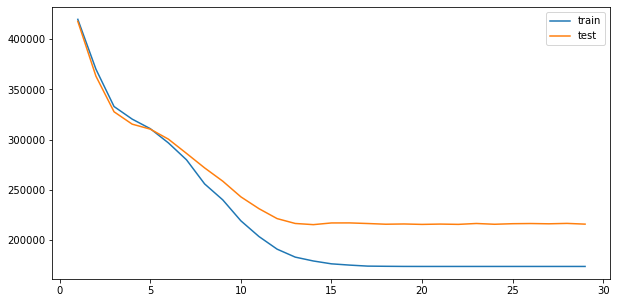

In [48]:
#시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) #그림의 크기 결정
plt.plot(range(1,30),train_score_list, label='train') # 선그래프 그리기
plt.plot(range(1,30),val_score_list, label='test') # 선그래프 그리기
plt.legend() # 범례
plt.show() # 그림 보여주기

In [ ]:
# 최적ㄷ의 하이퍼파라미터 설정
final_model = DecisionTreeRegressor(max_depth=5)
final_model.fit(X_train3,y_train3)
pre = final_model.predict(X_test)

In [ ]:
submisstion['Price'] = pre
submission.to_csv("./data/house/myPrediction.csv")